In [400]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import json

with open('oed_credentials.json') as f:
    credentials = json.load(f)

app_id = credentials["app_id"]
app_key = credentials["app_key"]


# url = "https://od-api.oxforddictionaries.com/api/v2/<endpoint>/<language_code>/<word_id>"
#endpoint:
##‘entries’ = retrieve dictionary information about a word
##‘thesaurus’ = retrieve similar words
##‘sentences’ = retrieve example sentences for a word)


endpoint = "entries"
language_code = "en-gb"
word_id = "machine"


url = "https://oed-researcher-api.oxfordlanguages.com/oed/api/v0.2/words/?lemma=" + word_id
r = requests.get(url, headers = {"app_id": app_id, "app_key": app_key})
data = json.dumps(r.json())
word = json.loads(data)

word.keys()
#Senses: https://oed-researcher-api.oxfordlanguages.com/oed/api/v0.2/word/monitor_nn01/senses/
#['meta', 'links', 'data']

dict_keys(['meta', 'links', 'data'])

## Analysis

In [401]:
word['meta']

{'total': 2,
 'count': 2,
 'offset': 0,
 'limit': 100,
 'provider': 'Oxford University Press',
 'cite': 'Oxford English Dictionary API, Oxford University Press, 0.0.0.0/oed/api/v0.2/words/?lemma=machine&offset=0&limit=100 . Accessed 18 September 2020'}

In [402]:
word['links']

{'self': '/oed/api/v0.2/words/?lemma=machine&offset=0&limit=100',
 'prev': None,
 'next': None,
 'first': '/oed/api/v0.2/words/?lemma=machine&offset=0&limit=100',
 'last': '/oed/api/v0.2/words/?lemma=machine&offset=0&limit=100'}

# Definitions of "machine"

In [403]:
for definition in word['data']:
    print(str(definition['id']))

machine_vb01
machine_nn01


In [404]:
len(word['data'])
for item in word['data']:
    keys = ['id', 'band', 'meta', 'lemma', 'oed_url', 'daterange', 'etymology', 'first_use', 'frequency', 'sense_ids', 'definition', 'main_entry', 'inflections', 'frequency_id', 'oed_reference', 'pronunciations', 'parts_of_speech', 'primary_sense_id']
    for k in keys:
        if str(k) == 'id':
            print('############################')
            print(k ,': ', item[k])
            print('')
        else:    
            print(k ,': ', item[k])
            print('')


############################
id :  machine_vb01

band :  10

meta :  {'created': 1904, 'revised': True, 'updated': 2000}

lemma :  machine

oed_url :  https://www.oed.com/view/Entry/111851#eid38480197

daterange :  {'end': None, 'start': 1450, 'obsolete': False, 'rangestring': '?c1450—'}

etymology :  {'etymons': [{'word': 'machiner', 'language': 'French'}, {'word': 'machine', 'language': 'English', 'target_id': 'machine_nn01', 'part_of_speech': 'NN'}], 'etymology_type': 'borrowing', 'etymon_language': [['European languages', 'Italic', 'Romance', 'Italo-Western', 'Gallo-Romance', 'French'], ['English']], 'source_language': [['European languages', 'Italic', 'Romance', 'Italo-Western', 'Gallo-Romance', 'French'], ['European languages', 'Italic', 'Latin'], ['English']], 'etymology_summary': 'A borrowing from French.'}

first_use :  Life of St. Cuthbert

frequency :  [[1750, 0.071], [1760, 0.072], [1770, 0.076], [1780, 0.075], [1790, 0.078], [1800, 0.079], [1810, 0.079], [1820, 0.081], [18

# Frequency of each definition

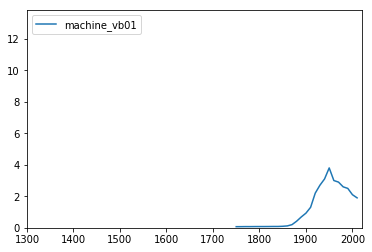

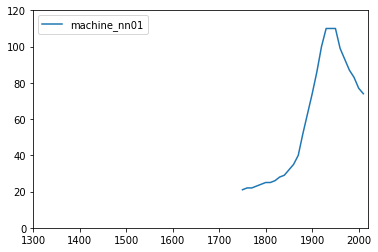

In [405]:
#not sure about how the frequency is calculated.. but this is a plot of the two definitions
frequency = {}
for i,w in enumerate(word['data']):
    frequency = dict(w['frequency'])
    x, y = zip(*frequency.items())
    plt.plot(x, y, label =w['id'])
    plt.xlim((1300,2020))
    plt.ylim((0, max(y) + 10))
    plt.legend(loc="upper left")
    plt.show() 

# Senses (sample = first word definition)

In [406]:
#let's take the senses of the first word id/definition (as a sample)

senses = word['data'][0].get('sense_ids')
print(senses)

['machine_vb01-38480199', 'machine_vb01-38480251', 'machine_vb01-38480267', 'machine_vb01-38480282', 'machine_vb01-38480402', 'machine_vb01-38480424', 'machine_vb01-38480453', 'machine_vb01-38480455']


In [407]:
senses_overview = pd.DataFrame()

url = "https://oed-researcher-api.oxfordlanguages.com/oed/api/v0.2/word/machine_nn01/senses/?offset=0&limit=10000"
r = requests.get(url, headers = {"app_id": app_id, "app_key": app_key})
data = json.dumps(r.json())
senses = json.loads(data)
for item in senses['data']:
    senses_overview = senses_overview.append(pd.io.json.json_normalize(item))
senses_overview.head(3)
#senses_overview.to_csv('senses.csv')


,categories.region,categories.register,categories.topic,daterange.end,daterange.obsolete,daterange.rangestring,daterange.start,definition,first_use,id,...,meta.sense_group,meta.updated,notes,oed_reference,oed_url,part_of_speech,quotation_ids,semantic_class_ids,transitivity,word_id
0,[],[[rare]],[],None,False,1545—,1545,"A material or immaterial structure, esp. the f...",J. Schäfer,machine_nn01-38473945,...,machine_nn01-g01,2000,[],"machine, n., sense I.1a",https://www.oed.com/view/Entry/111850#eid38473945,NN,"[machine_nn01-38473950, machine_nn01-38473961,...","[[1, 111290, 118635, 119024, 120162, 120172], ...",None,machine_nn01
0,[],[[historical]],"[[Military, Weaponry]]",None,False,1583—,1583,A military engine or siege-tower. Cf. war mach...,Brian Melbancke,machine_nn01-38474233,...,machine_nn01-g03,2000,[],"machine, n., sense II.3",https://www.oed.com/view/Entry/111850#eid38474233,NN,"[machine_nn01-38474243, machine_nn01-38474252,...","[[153072, 160439, 163207, 163208, 163377, 1633...",None,machine_nn01
0,[],[],[],1707,True,1595—1707,1595,spec. A scheme or plot. Obsolete.,Elizabeth I,machine_nn01-38474097,...,machine_nn01-g01,2000,[],"machine, n., sense I.1b",https://www.oed.com/view/Entry/111850#eid38474097,NN,"[machine_nn01-38474102, machine_nn01-38474122,...","[[1, 84689, 87987, 87988, 87989, 88083, 88109,...",None,machine_nn01


In [408]:
# Request full list of senses with quotations and save json


#url = "https://oed-researcher-api.oxfordlanguages.com/oed/api/v0.2/word/machine_nn01?include_senses=true&include_quotations=true"
r = requests.get(url, headers = {"app_id": app_id, "app_key": app_key})
data = json.dumps(r.json())

with open('data.json', 'w', encoding='utf-8') as f:
    json.dump(r.json(), f, ensure_ascii=False, indent=4)

In [409]:
#use file stored locally to avoid making new requests

with open('_data.json') as json_data:
    d = json.loads(json_data.read())

In [410]:
#df = pd.io.json.json_normalize(d)
#df.to_csv('_data_df_definition.csv')

In [412]:
df_sense_quotes_expanded = pd.DataFrame()
df_senses = pd.DataFrame()
df_quotes = pd.DataFrame()


In [413]:
#make quotes more readable in export csv

def json_to_string(list_quotes):
    s = []
    for q in list_quotes:        
        for k, v in q.items():
            string = str(k) +':  '+ str(v)
            s.append(string)
        s.append('\n')
    return '\n'.join(s)

s_ids = []

for i,s in enumerate(d['data']['senses']):
    df_senses = df_senses.append(pd.io.json.json_normalize(s))
    s_ids.append(s['id'])

df_senses['sense_id'] = s_ids
df_senses['quotations'] = df_senses['quotations'].apply(lambda x: json_to_string(x))


In [414]:
#semantic class definitions to labels

def semantic_class_ids_to_label(semantic_class_ids):
    sc = []
    for i in range(len(semantic_class_ids)):
        for sem_id in semantic_class_ids[i]:
            #print(sem_id)
            url_sem = "https://oed-researcher-api.oxfordlanguages.com/oed/api/v0.2/semanticclass/" + str(sem_id)
            r_sem = requests.get(url_sem, headers = {"app_id": app_id, "app_key": app_key})
            entry_json_sem = json.dumps(r_sem.json())
            entry_sem = json.loads(entry_json_sem)
            #print(str(entry_sem))
            m = str(sem_id )+ ': ' + str(entry_sem['data']['label']) 
            sc.append(m)
    return '\n'.join(sc)

df_senses['semantic_class_ids'] = df_senses['semantic_class_ids'].apply(lambda x: semantic_class_ids_to_label(x))

In [415]:
df_senses

,categories.region,categories.register,categories.topic,daterange.end,daterange.obsolete,daterange.rangestring,daterange.start,definition,first_use,id,...,meta.updated,notes,oed_reference,oed_url,part_of_speech,quotations,semantic_class_ids,transitivity,word_id,sense_id
0,[],[[rare]],[],None,False,1545—,1545,"A material or immaterial structure, esp. the f...",J. Schäfer,machine_nn01-38473945,...,2000,[],"machine, n., sense I.1a",https://www.oed.com/view/Entry/111850#eid38473945,NN,id: machine_nn01-38473950\ntext: {'keyword':...,1: the world\n111290: relative properties\n118...,None,machine_nn01,machine_nn01-38473945
0,[],[[historical]],"[[Military, Weaponry]]",None,False,1583—,1583,A military engine or siege-tower. Cf. war mach...,Brian Melbancke,machine_nn01-38474233,...,2000,[],"machine, n., sense II.3",https://www.oed.com/view/Entry/111850#eid38474233,NN,id: machine_nn01-38474243\ntext: {'keyword':...,153072: society\n160439: armed hostility\n1632...,None,machine_nn01,machine_nn01-38474233
0,[],[],[],1707,True,1595—1707,1595,spec. A scheme or plot. Obsolete.,Elizabeth I,machine_nn01-38474097,...,2000,[],"machine, n., sense I.1b",https://www.oed.com/view/Entry/111850#eid38474097,NN,id: machine_nn01-38474102\ntext: {'keyword':...,1: the world\n84689: action or operation\n8798...,None,machine_nn01,machine_nn01-38474097
0,[],[],"[[Sciences, Medicine, Anatomy]]",None,False,1604—,1604,"A living body, esp. the human body considered ...",William Shakespeare,machine_nn01-38474140,...,2000,[],"machine, n., sense I.2",https://www.oed.com/view/Entry/111850#eid38474140,NN,id: machine_nn01-38474151\ntext: {'keyword':...,1: the world\n8835: life\n25507: the body\n291...,None,machine_nn01,machine_nn01-38474140
0,[],"[[historical], [poetic and literary]]","[[Arts, Performing Arts, Theatre]]",None,False,1609—,1609,Theatre. A (usually movable) contrivance for t...,Ben Jonson,machine_nn01-38474301,...,2000,[In early use predominantly a ‘flying’ car alo...,"machine, n., sense II.4a",https://www.oed.com/view/Entry/111850#eid38474301,NN,id: machine_nn01-38474320\ntext: {'keyword':...,153072: society\n222360: leisure\n224508: the ...,None,machine_nn01,machine_nn01-38474301
0,[],[[colloquial and slang]],"[[Transport, Nautical]]",None,False,1637—,1637,A ship or other vessel. Now colloquial: a boat.,Thomas Heywood,machine_nn01-38474548,...,2000,[],"machine, n., sense III.5a",https://www.oed.com/view/Entry/111850#eid38474548,NN,id: machine_nn01-38474552\ntext: {'keyword':...,153072: society\n198379: travel\n202986: trave...,None,machine_nn01,machine_nn01-38474548
0,"[[North America, Canada]]","[[archaic], [regional]]",[],None,False,1648—,1648,"In general use: an apparatus, device, instrume...",Moderate,machine_nn01-38475164,...,2000,[],"machine, n., sense IV.6a",https://www.oed.com/view/Entry/111850#eid38475164,NN,id: machine_nn01-208243324\ntext: {'keyword'...,1: the world\n84689: action or operation\n8798...,None,machine_nn01,machine_nn01-38475164
0,[],[],"[[Technology, Electrical], [Technology, Engine...",None,False,1659—,1659,"A complex device, consisting of a number of in...",T. St. Serfe,machine_nn01-38475286,...,2000,"[In 19th- and early 20th-cent. use, the word t...","machine, n., sense IV.6b",https://www.oed.com/view/Entry/111850#eid38475286,NN,id: machine_nn01-38475290\ntext: {'keyword':...,153072: society\n208185: occupation and work\n...,None,machine_nn01,machine_nn01-38475286
0,[],[[rare]],[],None,False,1674—,1674,"In literature, etc.: a contrivance for the sak...",Thomas Rymer,machine_nn01-38474405,...,2000,[],"machine, n., sense II.4b",https://www.oed.com/view/Entry/111850#eid38474405,NN,id: machine_nn01-38474409\ntext: {'keyword':...,,None,machine_nn01,machine_nn01-38474405
0,[],[],[],None,False,1676—,1676,figurative in general use.,Thomas Guidott,machine_nn01-38475994,...,2000,[],"machine, n., sense V.8a",https://www.oed.com/view/Entry/111850#eid38475994,NN,id: machine_nn01-38475998\ntext: {'keyword':...,,None,machine_nn01,machine_nn0

In [416]:
#df_senses['quotations']
df_senses.set_index('sense_id')
df_senses.to_csv('_senses_plain_quotes.csv')

In [ ]:
# Quotations...

In [ ]:
quotation_ids = senses_overview['quotation_ids']
quotation_ids


In [ ]:
quotes['links']

In [ ]:
quotations_overview = pd.DataFrame()
for q in quotation_ids:
    url = "https://oed-researcher-api.oxfordlanguages.com/oed/api/v0.2/sense/" + s + "/quotations/"
    r = requests.get(url, headers = {"app_id": app_id, "app_key": app_key})
    data = json.dumps(r.json())
    quotes = json.loads(data)
    for item in quotes['data']:
        quotations_overview = quotations_overview.append(pd.io.json.json_normalize(item))
quotations_overview

In [ ]:
quotations_overview['text.full_text']